In [18]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
data = pd.read_csv('ace_lensing/data/training_set.csv')

In [20]:
data.pdf[0]

'[0.00153377 0.00157363 0.00161348 ... 0.00024175 0.00024207 0.00024239]'

In [6]:
import numpy as np

ValueError: '[0.00153377 0.00157363 0.00161348 ... 0.00024175 0.00024207 0.00024239]' is not a valid format string (unrecognized character '[')

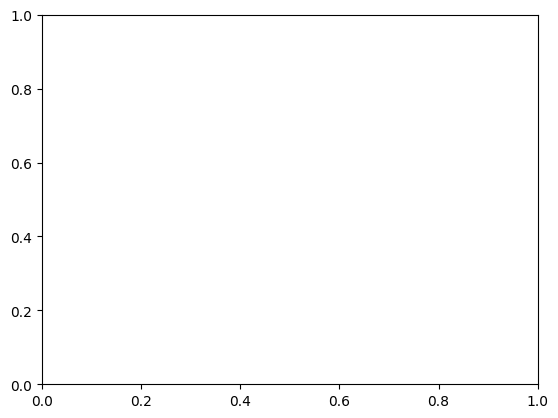

In [19]:
plt.plot(data['mu_vec'][0], data['pdf'][0])

In [23]:
data.pdf[0].replace(' ',',')

'[0.00153377,0.00157363,0.00161348,...,0.00024175,0.00024207,0.00024239]'

In [22]:
data.pdf[0]

'[0.00153377 0.00157363 0.00161348 ... 0.00024175 0.00024207 0.00024239]'

In [24]:
import ast

list = ast.literal_eval(data.pdf[0].replace(' ',','))

In [25]:
list

[0.00153377,
 0.00157363,
 0.00161348,
 Ellipsis,
 0.00024175,
 0.00024207,
 0.00024239]

In [3]:
import pandas as pd
import os
def load_training_data() -> pd.DataFrame:
    """
    Load the training data by combining separate Parquet files for different columns.
    Returns:
    --------
    pd.DataFrame
        Training data in pandas DataFrame format with all necessary columns.
    Raises:
    -------
    FileNotFoundError
        If any of the training data files are not found.
    Exception
        If any other error occurs while loading the training data.
    """
    base_path = '/home/turker/ACE-Lensing/ace_lensing/data/'
    files = {
        'mu_vec': 'training_set_mu_vec.parquet',
        'pdf': 'training_set_pdf.parquet',
        'error': 'training_set_error.parquet',
        'cosmo': 'training_set_cosmo.parquet',
        'statistics': 'training_set_statistics.parquet'
    }
    try:
        # Load individual Parquet files
        train_mu_vec = pd.read_parquet(os.path.join(base_path, files['mu_vec']))
        train_pdf = pd.read_parquet(os.path.join(base_path, files['pdf']))
        train_error = pd.read_parquet(os.path.join(base_path, files['error']))
        train_cosmo = pd.read_parquet(os.path.join(base_path, files['cosmo']))
        train_statistics = pd.read_parquet(os.path.join(base_path, files['statistics']))
        print(train_mu_vec.info())
        print(train_pdf.info())
        print(train_error.info())
        print(train_cosmo.info())
        print(train_statistics.info())
        # Merge the DataFrames on the 'sim name' column
#         df = train_mu_vec.merge(train_pdf, on='sim name') \
#                          .merge(train_error, on='sim name') \
#                          .merge(train_cosmo, on='sim name') \
#                          .merge(train_statistics, on='sim name')
        df = pd.concat([train_mu_vec, train_pdf['pdf'], train_error['sigma'],
                        train_cosmo[['Om', 'h', 'w', 's8', 'z']],
                        train_statistics[['mean', 'var', '3th', '4th', '5th', '6th', '7th', '8th', '9th', '10th']]],
                       axis=1)
        return df
    except FileNotFoundError as e:
        raise FileNotFoundError(f"Training data file not found: {e.filename}")
    except Exception as e:
        raise Exception(f"An error occurred while loading training data: {e}")

In [4]:
df = load_training_data()

<class 'pandas.core.frame.DataFrame'>
Index: 1157 entries, 0 to 1156
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mu_vec  1157 non-null   object
dtypes: object(1)
memory usage: 18.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1157 entries, 0 to 1156
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pdf     1157 non-null   object
dtypes: object(1)
memory usage: 18.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1157 entries, 0 to 1156
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sigma   1157 non-null   object
dtypes: object(1)
memory usage: 18.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1157 entries, 0 to 1156
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sim name  1157 non-null   object 
 1   Om        11

In [5]:
df

,mu_vec,pdf,sigma,Om,h,w,s8,z,mean,var,3th,4th,5th,6th,7th,8th,9th,10th
0,"[-2.0, -1.997999599919984, -1.995999199839968,...","[0.0015337738, 0.0015736255, 0.0016134771, 0.0...","[2.3729974e-05, 2.402046e-05, 2.431095e-05, 2....",0.2020,0.636364,-0.9182,0.8192,3.5192,1.009821,0.013078,0.008627,0.032985,0.189976,1.271750,9.132367,68.389464,526.839707,4142.505404
1,"[-2.0, -1.997999599919984, -1.995999199839968,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.3374,0.624242,-0.9424,0.8859,1.5484,1.011250,0.023430,0.053956,0.277787,1.762238,12.280135,90.221551,685.942479,5342.251013,42357.996445
2,"[-2.0, -1.997999599919984, -1.995999199839968,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.849...",0.3798,0.628283,-1.0697,0.7424,4.7982,1.050106,0.102776,0.239660,1.233093,7.723689,53.384647,389.680544,2946.048191,22826.435594,180112.033128
3,"[-2.0, -1.997999599919984, -1.995999199839968,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.1810379e-06, ...",0.3677,0.658586,-0.8333,0.8677,2.8796,1.035372,0.083580,0.234359,1.260918,8.083270,56.530234,415.722327,3159.747492,24584.633193,194659.520860
4,"[-2.0, -1.997999599919984, -1.995999199839968,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.3535,0.775758,-1.0091,0.8798,0.7179,1.002170,0.004352,0.006897,0.032270,0.199036,1.370699,10.011372,75.873415,589.886870,4672.959407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152,"[-2.0, -1.997999599919984, -1.995999199839968,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.3354,0.741414,-0.7485,0.8455,0.7545,1.001880,0.003842,0.005984,0.027799,0.170377,1.166289,8.470689,63.869371,494.293835,3899.935636
1153,"[-2.0, -1.997999599919984, -1.995999199839968,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.3980,0.632323,-0.9303,0.7869,0.3786,0.999976,0.000540,0.000259,0.000790,0.004354,0.028807,0.206834,1.557284,12.100360,96.160480
1154,"[-2.0, -1.997999599919984, -1.995999199839968,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.2626,0.755556,-0.7667,0.8414,0.6010,1.000367,0.001143,0.001015,0.003968,0.022991,0.153017,1.091300,8.119542,62.189557,486.569611
1155,"[-2.0, -1.997999599919984, -1.995999199839968,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.3293,0.600000,-1.1424,0.7970,1.4511,1.007394,0.013026,0.021158,0.100577,0.621629,4.281327,31.252142,236.679739,1838.825067,14558.080432


In [1]:
import pandas as pd
import pkg_resources
def load_training_data() -> pd.DataFrame:
    """
    Load the training data by combining separate Parquet files for different columns.
    Returns:
    --------
    pd.DataFrame
        Training data in pandas DataFrame format with all necessary columns.
    Raises:
    -------
    FileNotFoundError
        If any of the training data files are not found.
    Exception
        If any other error occurs while loading the training data.
    """
    base_path = 'data/training_set_{}.parquet'
    try:
        # Use f-strings to dynamically generate file paths
        train_mu_vec = pd.read_parquet(pkg_resources.resource_filename('ace_lensing', base_path.format('mu_vec')))
        train_pdf = pd.read_parquet(pkg_resources.resource_filename('ace_lensing', base_path.format('pdf')))
        train_error = pd.read_parquet(pkg_resources.resource_filename('ace_lensing', base_path.format('error')))
        train_cosmo = pd.read_parquet(pkg_resources.resource_filename('ace_lensing', base_path.format('cosmo')))
        train_statistics = pd.read_parquet(pkg_resources.resource_filename('ace_lensing', base_path.format('statistics')))
        # Merge the DataFrames on the 'sim name' column
        df = train_mu_vec.merge(train_pdf, on='sim name') \
                         .merge(train_error, on='sim name') \
                         .merge(train_cosmo, on='sim name') \
                         .merge(train_statistics, on='sim name')
        return df
    except FileNotFoundError as e:
        raise FileNotFoundError(f"Training data file not found: {e.filename}")
    except Exception as e:
        raise Exception(f"An error occurred while loading training data: {e}")

In [ ]:
df